# ROI - Stand Alone Service

## 0. Imports

In [2]:
import os
import sys
import numpy as np
%load_ext autoreload
%autoreload 2

git_dir = r"D:\work\git\gis_tools"
sys.path.append(os.path.join(git_dir, 'Code'))
sys.path.append(os.path.join(git_dir, 'HydroLogic_Inundation_toolbox'))
sys.path.append(os.path.join(git_dir, 'HydroLogic_Inundation_toolbox/Readers'))

from notebooks.background_scripting.v1.test_connection import TestConnection
test_connection = TestConnection()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Imports are succesfull!


## 1. Model specifications 

### 1.1. Select basemodel

In [3]:
from notebooks.background_scripting.v1.select_basemodel import ModelSettings

model_settings = ModelSettings()
model_settings.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

### 1.2. Model settings

In [4]:
import shutil
from notebooks.background_scripting.v1.modify_mdu import ModifyMDU, copy_model

#model_path = copy_model(os.path.join(model_settings.settings['folder'], model_settings.settings['model']), model_settings.settings['scenario_name'])
model_path = r"D:\Work\Project\P1414\Models\Combined\V18_WBD_v3\run_model"
modify_mdu = ModifyMDU(model_path)
modify_mdu.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

### 1.3. Dambreak location

In [ ]:
from notebooks.background_scripting.v1.modify_dambreak_v2 import DambreakWidget

dambreakWidget = DambreakWidget(model_path)
dambreakWidget.draw_map()

### 1.4. Dambreak settings

In [5]:
from notebooks.background_scripting.v1.modify_dambreak_v2 import ModifyDambreak

add_dambreak = ModifyDambreak(model_path, dambreakWidget.settings, dambreakWidget.keringen)
add_dambreak.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Dambreak settings are:'

{
    "crestLevelIni": -1.0,
    "t0": 0.0,
    "timeToBreachToMaximumDepth": 360.0,
    "crestLevelMin": -2.0,
    "breachWidthIni": 5.0,
    "f1": 1.3,
    "f2": 0.04,
    "uCrit": 0.2
}


### 1.5. Boundary conditions

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Boundary conditions are:'

{
    "Waterlevel North Sea": 0.0,
    "Waterlevel Markermeer": 0.0,
    "Rhine basic discharge": 5000.0,
    "Rhine peak discharge": 20000.0,
    "Rhine event start": 0.0,
    "Rhine event duration": 86400.0
}


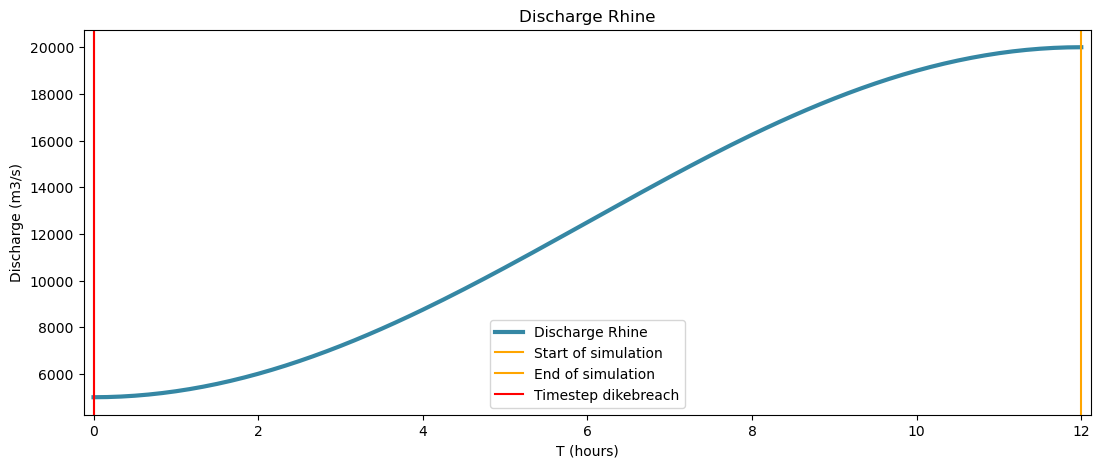

In [6]:
from notebooks.background_scripting.v1.modify_boundaries import ModifyBoundaries, ModifyRhineDischarge

modify_boundaries = ModifyBoundaries(model_path, modify_mdu.settings, add_dambreak.dambreak_settings)
modify_boundaries.display_widgets()

## 2. Run Model

In [7]:
from notebooks.background_scripting.v1.model_runner import ModelRunner

model_runner = ModelRunner(model_path)
model_runner.display_widgets()

Button(description='Run model!', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_color='#3…

Output()

## 3. Post processing

### 3.1. Plot map

Button(description='Plot map', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_color='#358…

Output()

'Plot settings are:'

{
    "aggregation_type": "maximum",
    "color_map": "viridis",
    "max_value_legend": 2.0,
    "mesh_resolution": 200.0,
    "min_value_legend": 0.0,
    "output_file_path": "D:\\work\\Project\\P1414\\Models_SAS\\Model_runs\\test_run_HHR\\dflowfm\\output\\post_processing",
    "plot_variable": "Mesh2d_waterdepth",
    "timestep": "not applicable"
}


HTML(value='<p>Generating plot... (first plot can take a while)</p>')

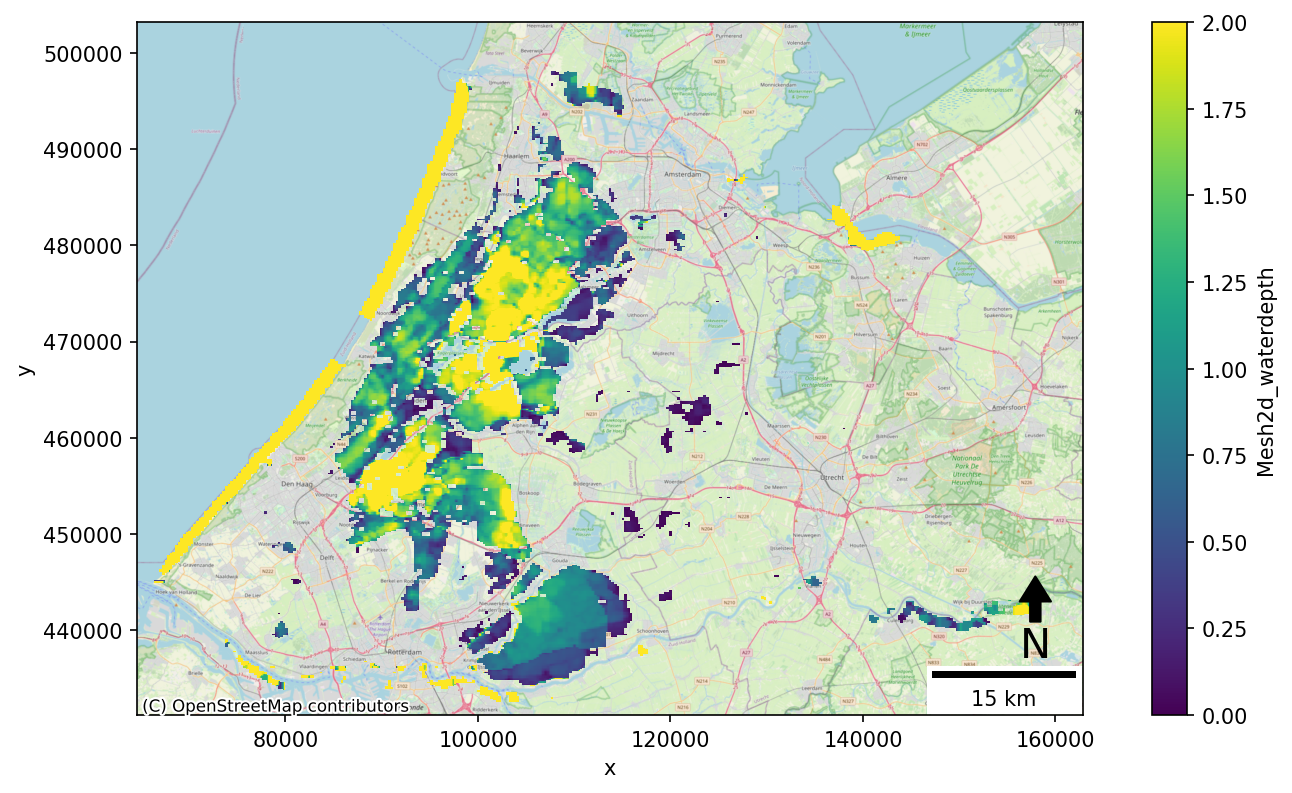

In [18]:
from notebooks.background_scripting.v1.post_processing import PlotSettingsMap, MapPlotter

output_path = os.path.join(model_path, 'dflowfm\output')
plot_settings = PlotSettingsMap(output_path)
plot_settings.display_widgets()

### 3.2. Plot dambreak

Button(description='Plot breach information', layout=Layout(height='35px', width='99%'), style=ButtonStyle(but…

Output()

'Plot settings are:'

{
    "his_path": "D:\\work\\Project\\P1414\\Models_SAS\\Model_runs\\test_run_HHR\\dflowfm\\output\\DFM_his.nc",
    "output_file_path": "D:\\work\\Project\\P1414\\Models_SAS\\Model_runs\\test_run_HHR\\dflowfm\\output\\post_processing",
    "plot_variables": [
        "dambreak_discharge",
        "dambreak_cumulative_discharge"
    ]
}


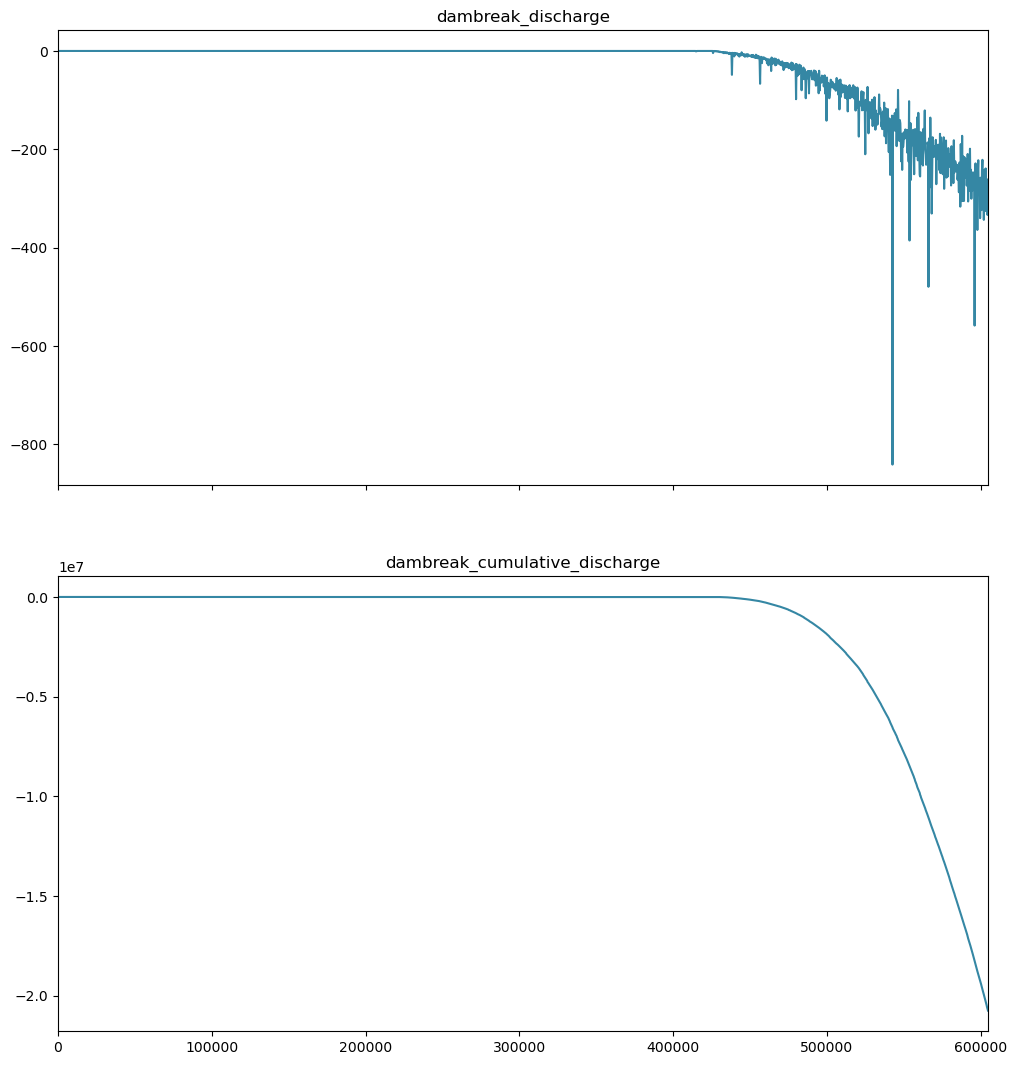

In [20]:
from notebooks.background_scripting.v1.post_processing import PlotSettingsBreach, BreachPlotter


output_path = os.path.join(model_path, 'dflowfm\output')
plot_settings = PlotSettingsBreach(output_path)
plot_settings.display_widgets()

